# Mini Project: RK4 Solution for the Simple Pendulum and Error Comparisons
The simple pendulum is a staple for an introductory classical mechanics class, but finding analytical solutions to the equations of motion requires important approximations of nonlinear terms. Specificially, the simple pendulum is described by the following equation of motion:
$$
\frac{d^2\theta}{dt^2}+\frac{g}{l}\sin\theta=0
$$

This differential equation has no analytical solution, but can be reduced to a simple linear equation in the approximation of small $\theta$,
$$
\sin{\theta}\approx1
$$
Thus, the equation of motion is reduced to
$$
\frac{d^2\theta}{dt^2}+\frac{g}{l}\theta=0
$$
which has the analytical solution
$$
\theta = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right)
$$
where $\theta_0$ is the initial release angle.  

Using a 4th order Runge-Kutta method, a numerical solution for the unapproximated equation of motion can be found and compared to the small angle approximation.

In [2]:
import numpy as np

#Defining constants
g = 9.81
l = 1

#First, the small angle approximation
def smallangle(t, theta0):
    theta = theta0*np.cos(np.sqrt(g/l)*t)
    return theta

In [3]:
#Defining step size and t domain
h=0.01
tpoints = np.arange(0, 10, h)

#counting number of steps
N = len(tpoints)
print(N)

#Defining the differential equation
def dw_dt(theta):
    return -g/l*np.sin(theta)


#Iterating through each time step
def RK4solve(theta0, w0):
    #Defining zero matrices to be populated with solution
    thetapoints = np.zeros(N)
    wpoints = np.zeros(N)
    thetapoints[0] = theta0
    wpoints[0] = w0
    for n in range(0, N-1):
        #Calculating k terms for both first order equations
        k1theta = h*(wpoints[n])
        k1w = h*dw_dt(thetapoints[n])

        k2theta = h*(wpoints[n]+0.5*k1w)
        k2w = h*dw_dt(thetapoints[n]+0.5*k1theta)

        k3theta = h*(wpoints[n]+0.5*k2w)
        k3w = h*dw_dt(thetapoints[n]+0.5*k2theta)

        k4theta = h*(wpoints[n]+k3w)
        k4w = h*dw_dt(thetapoints[n]+k3theta)

        #Modifying next value to reflect RK4 term
        thetapoints[n+1] = thetapoints[n] + (k1theta+2*k2theta+2*k3theta+k4theta)/6
        wpoints[n+1] = wpoints[n] + (k1w+2*k2w+2*k3w+k4w)/6
    return thetapoints, wpoints

1000


### Now, we plot the comparison between the small angle approximation solution and the unapproximated numerical solution:

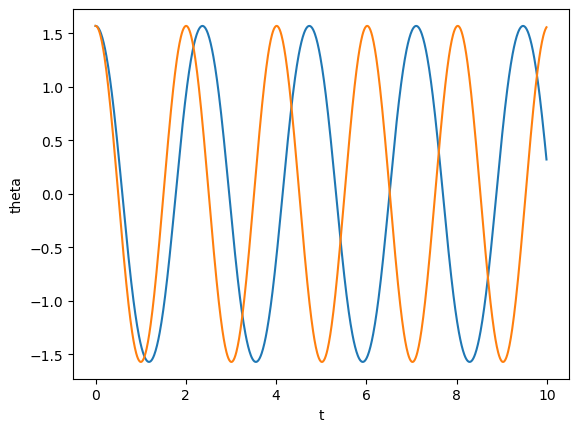

In [5]:
from pylab import plot, xlabel, ylabel, show

#Running RK4solve with initial conditions
theta0 = np.pi/2
thetapoints, wpoints = RK4solve(theta0, 0)

plot(tpoints, thetapoints)
plot(tpoints, smallangle(tpoints, theta0))
#plot(tpoints, wpoints)
xlabel("t")
ylabel("theta")
show()

### It's clear that the small angle solution fails to match the numerical solution at this high release angle of $\pi/2$. The error between the two can be found for varying release points since the RK4 method was captured in a function. 
Error is calculated by summing the squares of the differences between the approximation solution and numerical solution for each theta

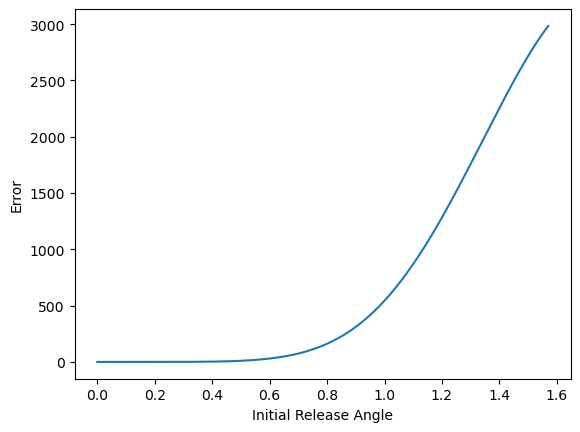

In [6]:
theta = np.arange(0, np.pi/2, h)
error = []

for theta0 in theta:
    approxtheta = smallangle(tpoints, theta0)
    thetapoints, wpoints = RK4solve(theta0, 0)
    error.append(sum((approxtheta-thetapoints)**2))

plot(theta, error)
xlabel("Initial Release Angle")
ylabel("Error")
show()

#### As seen in the graph, larger release angles lead to greater error when comparing the approximate solution to the numerical solution. By seeing the increase in error as the initial release angle increases, we can better understand precisely for what release this approximation generates a viable solution. The combination of this technique alongside the RK4 method enables a way to compare numerical solutions to approximate solutions. This can be extended to any system, given their equations of motion. With this, numerical bounds can be set for approximations that aren't nearly as ambiguious as "$\theta_0$ being very small".